<a href="https://colab.research.google.com/github/Arjun650/NNDL_LAB/blob/main/NNDL_LAB_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

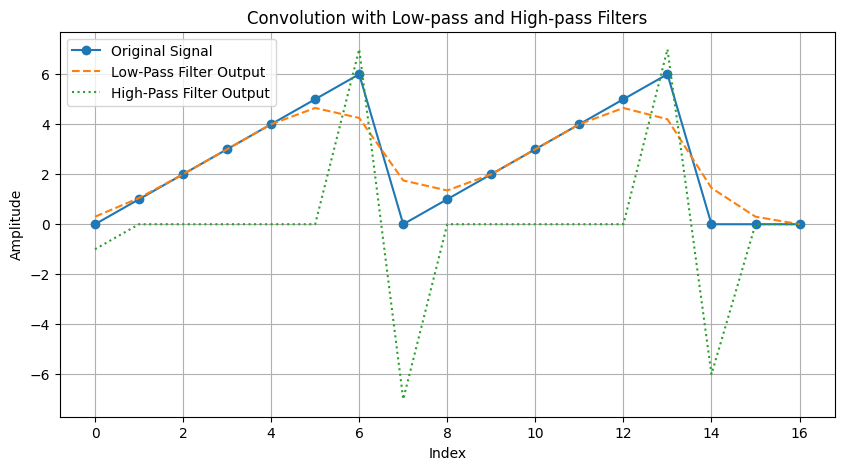

In [ ]:
X = [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
H_L = [0.05, 0.2, 0.5, 0.2, 0.05]
H_H = [-1, 2, -1]

# Perform convolution
y_low = np.convolve(X, H_L, mode='same')  # Smoothing effect
y_high = np.convolve(X, H_H, mode='same')  # Edge detection effect

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(X, label="Original Signal", marker='o')
plt.plot(y_low, label="Low-Pass Filter Output", linestyle='dashed')
plt.plot(y_high, label="High-Pass Filter Output", linestyle='dotted')

# Labels and legend
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.title("Convolution with Low-pass and High-pass Filters")
plt.legend()
plt.grid()
plt.show()

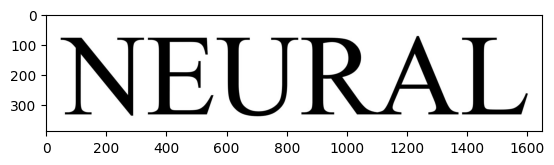

In [ ]:
im = imread(r"/content/Neural.JPG")
img = rgb2gray(im)*255
plt.imshow(img, cmap='gray')



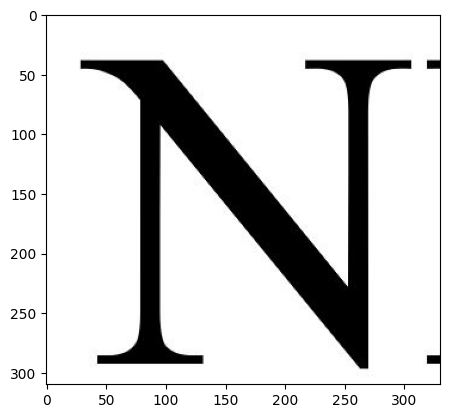

In [ ]:
img1 = img[40:350, 20:350]
plt.imshow(img1, cmap='gray')
plt.show()

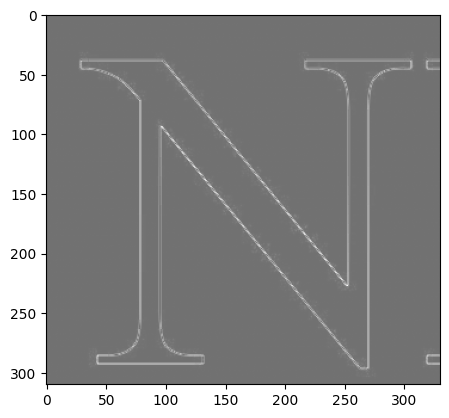

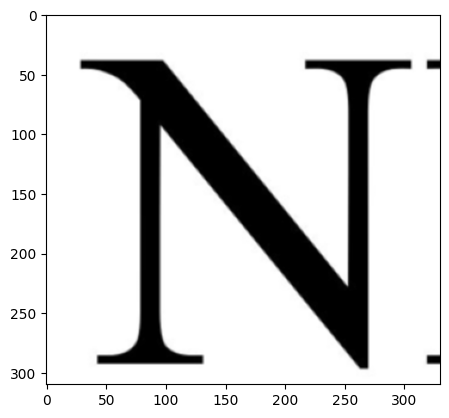

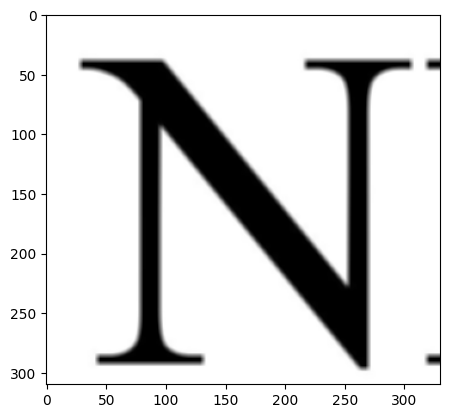

In [ ]:
fil1 = np.array([[ 0, -1, 0],
 [-1, 4, -1],
 [ 0, -1, 0]])
fil2 = np.array([[ 0.2, 0.5, 0.2],
 [0.5, 1, 0.5],
 [0.2, 0.5, 0.2]])
fil3 = np.array([[ 0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1]])

grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')
plt.imshow(abs(grad1),cmap='gray',vmin=np.min(grad1),vmax = np.max(grad1)
)
plt.show()
plt.imshow(grad2,cmap='gray')
plt.show()
plt.imshow(grad3,cmap='gray')

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"arjunkumardas","key":"d9879d12fb3fa4a4d86e85f2c3db954f"}'}

In [ ]:
import os
import zipfile

# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json to the .kaggle directory
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d techsash/waste-classification-data --unzip


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 426M/427M [00:21<00:00, 22.8MB/s]
100% 427M/427M [00:21<00:00, 20.4MB/s]


In [ ]:
!ls DATASET/TEST/O


O_12568.jpg  O_12769.jpg  O_12970.jpg  O_13171.jpg  O_13372.jpg  O_13573.jpg  O_13774.jpg
O_12569.jpg  O_12770.jpg  O_12971.jpg  O_13172.jpg  O_13373.jpg  O_13574.jpg  O_13775.jpg
O_12570.jpg  O_12771.jpg  O_12972.jpg  O_13173.jpg  O_13374.jpg  O_13575.jpg  O_13776.jpg
O_12571.jpg  O_12772.jpg  O_12973.jpg  O_13174.jpg  O_13375.jpg  O_13576.jpg  O_13777.jpg
O_12572.jpg  O_12773.jpg  O_12974.jpg  O_13175.jpg  O_13376.jpg  O_13577.jpg  O_13778.jpg
O_12573.jpg  O_12774.jpg  O_12975.jpg  O_13176.jpg  O_13377.jpg  O_13578.jpg  O_13779.jpg
O_12574.jpg  O_12775.jpg  O_12976.jpg  O_13177.jpg  O_13378.jpg  O_13579.jpg  O_13780.jpg
O_12575.jpg  O_12776.jpg  O_12977.jpg  O_13178.jpg  O_13379.jpg  O_13580.jpg  O_13781.jpg
O_12576.jpg  O_12777.jpg  O_12978.jpg  O_13179.jpg  O_13380.jpg  O_13581.jpg  O_13782.jpg
O_12577.jpg  O_12778.jpg  O_12979.jpg  O_13180.jpg  O_13381.jpg  O_13582.jpg  O_13783.jpg
O_12578.jpg  O_12779.jpg  O_12980.jpg  O_13181.jpg  O_13382.jpg  O_13583.jpg  O_13784.jpg
O_12579.jp

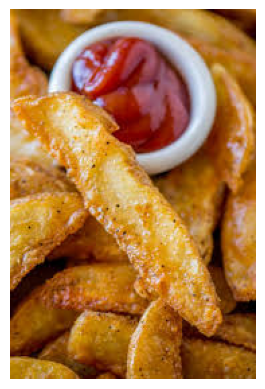

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# Define path to images
image_folder = "DATASET/TEST/O"  # Update based on folder structure
image_files = os.listdir(image_folder)

# Read and display the first image
img_path = os.path.join(image_folder, image_files[0])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

plt.imshow(img)
plt.axis("off")
plt.show()


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/content/DATASET/TEST/O"



In [ ]:
dataset_path

'/content/DATASET/TEST/O'

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/content/DATASET/TEST/"  # Update based on your dataset structure

# Image preprocessing & augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values (0-1)
    validation_split=0.2  # 80% training, 20% validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Get the number of classes
num_classes = len(train_generator.class_indices)
print("Number of Classes:", num_classes)


Found 2011 images belonging to 2 classes.
Found 502 images belonging to 2 classes.
Number of Classes: 2


In [7]:

train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

In [8]:

batch_size = 32
img_height = 64
img_width = 64


In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 22564 files belonging to 2 classes.
Using 18052 files for training.


In [10]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2513 files belonging to 2 classes.
Using 502 files for validation.


In [11]:

class_names = train_ds.class_names
print(class_names)

['O', 'R']


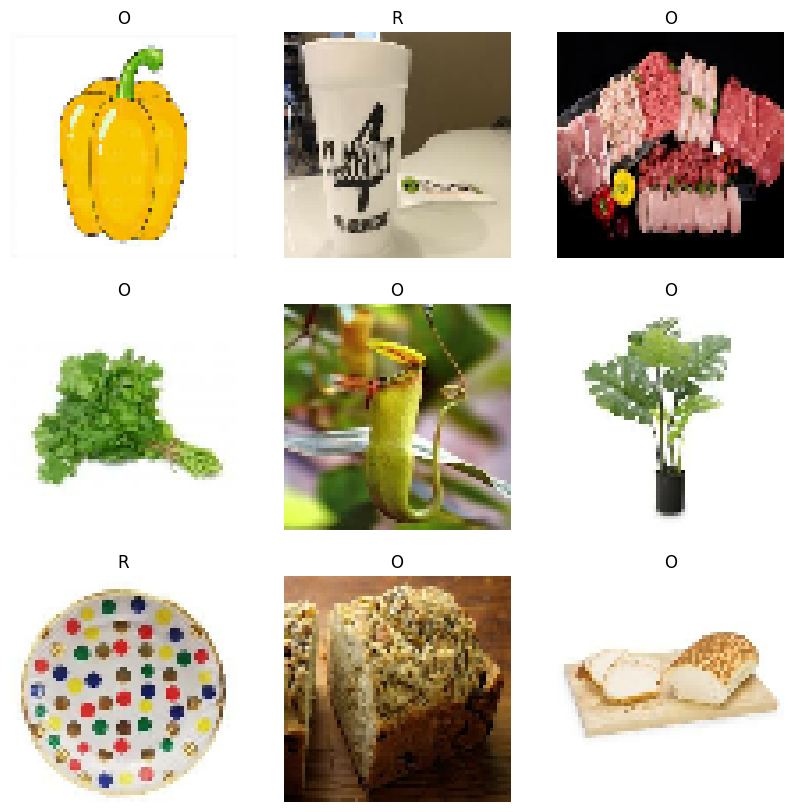

In [12]:

plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 64, 64, 3)
(32,)


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

# Image preprocessing & augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values (0-1)
    rotation_range=20,      # Data Augmentation
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test set

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Get number of classes
num_classes = len(train_generator.class_indices)
print("Number of Classes:", num_classes)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Number of Classes: 2


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Build the Fully Connected Network
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Convert 3D image to 1D vector
    Dense(512, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,166,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,330,818 (96.63 MB)

 Trainable params: 25,330,818 (96.63 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,  # Use test data as validation
    epochs=5,  # Adjust epochs if needed
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 102s 139ms/step - accuracy: 0.6159 - loss: 2.9298 - val_accuracy: 0.5615 - val_loss: 0.6173
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 94s 134ms/step - accuracy: 0.6306 - loss: 0.6204 - val_accuracy: 0.8599 - val_loss: 0.5061
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 142s 134ms/step - accuracy: 0.5805 - loss: 0.6434 - val_accuracy: 0.5575 - val_loss: 0.5621
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 142s 133ms/step - accuracy: 0.6185 - loss: 0.6281 - val_accuracy: 0.8544 - val_loss: 0.4923
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 141s 132ms/step - accuracy: 0.6706 - loss: 0.6028 - val_accuracy: 0.7899 - val_loss: 0.5332


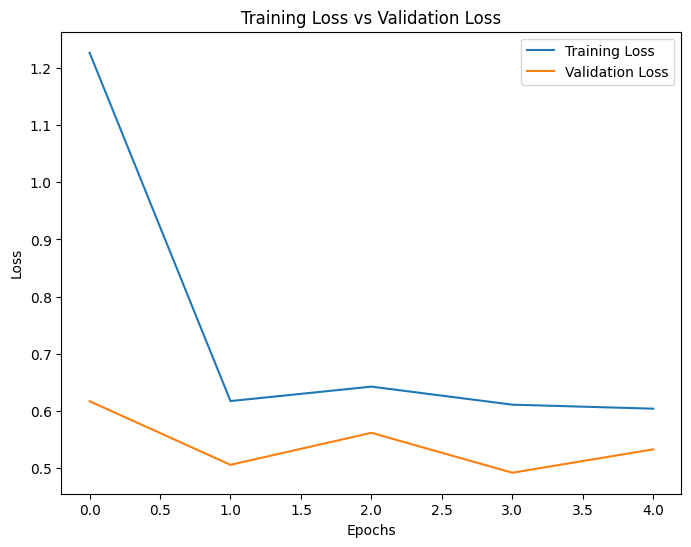

In [17]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()


In [18]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7919 - loss: 0.5264
Test Loss: 0.5332
Test Accuracy: 78.99%


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predicted labels
y_true = test_generator.classes  # Actual labels
y_pred = model.predict(test_generator)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class indices

# Print classification report
class_labels = list(test_generator.class_indices.keys())  # Get class names
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step
              precision    recall  f1-score   support

           O       0.56      0.45      0.49      1401
           R       0.44      0.55      0.49      1112

    accuracy                           0.49      2513
   macro avg       0.50      0.50      0.49      2513
weighted avg       0.50      0.49      0.49      2513



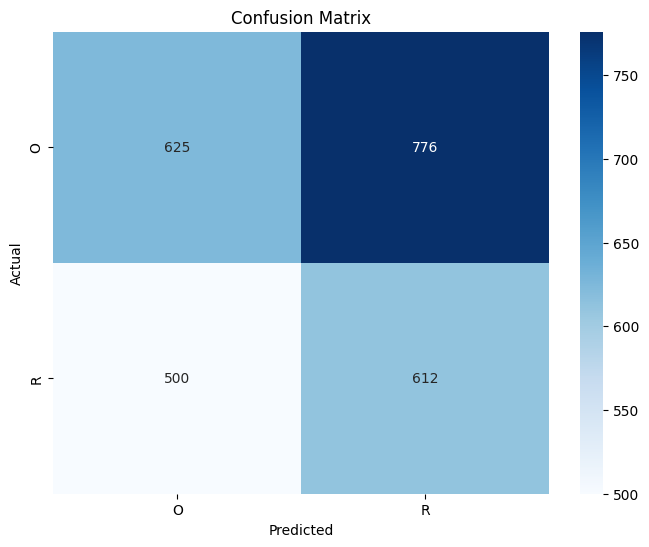

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
# test_dir = '/content/DATASET/TEST'
# Load a sample image
img_path = "/content/DATASET/TEST/O/O_12568.jpg"  # Replace with an actual image path
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())

print(f"Predicted Class: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
Predicted Class: O
